In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Data Exploration</h2>

In [136]:
df = pd.read_csv("heart_data.csv")

In [137]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [138]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [139]:
df.shape

(918, 12)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [141]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [142]:
df["HeartDisease"].describe()

count    918.000000
mean       0.553377
std        0.497414
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: HeartDisease, dtype: float64

In [143]:
df.duplicated().sum()

0

<h2>Analyzing Data</h2>

In [144]:
df_without_disease = df[df["HeartDisease"] == 0]
df_with_disease = df[df["HeartDisease"] == 1]

In [145]:
print(df_without_disease.shape)
print(df_with_disease.shape)

(410, 12)
(508, 12)


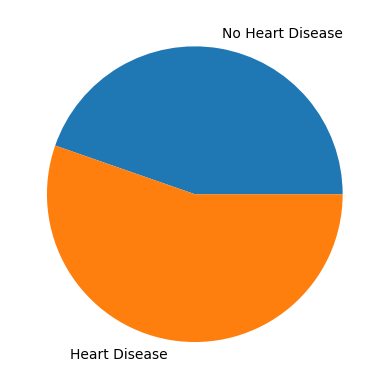

In [146]:
cases = np.array([df_without_disease.shape[0], df_with_disease.shape[0]])
labels = ["No Heart Disease", "Heart Disease"]

plt.pie(cases, labels =labels)
plt.show() 

In [147]:
for column in df.columns:
    print(f"{column} : {df[column].value_counts().count()}")

Age : 50
Sex : 2
ChestPainType : 4
RestingBP : 67
Cholesterol : 222
FastingBS : 2
RestingECG : 3
MaxHR : 119
ExerciseAngina : 2
Oldpeak : 53
ST_Slope : 3
HeartDisease : 2


In [148]:
selected_columns = ['ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

for column in selected_columns:
    print(f"\n{column:-^100}")
    print(f"{df[column].value_counts()}")


-------------------------------------------ChestPainType--------------------------------------------
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

---------------------------------------------FastingBS----------------------------------------------
FastingBS
0    704
1    214
Name: count, dtype: int64

---------------------------------------------RestingECG---------------------------------------------
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

-------------------------------------------ExerciseAngina-------------------------------------------
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

----------------------------------------------ST_Slope----------------------------------------------
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


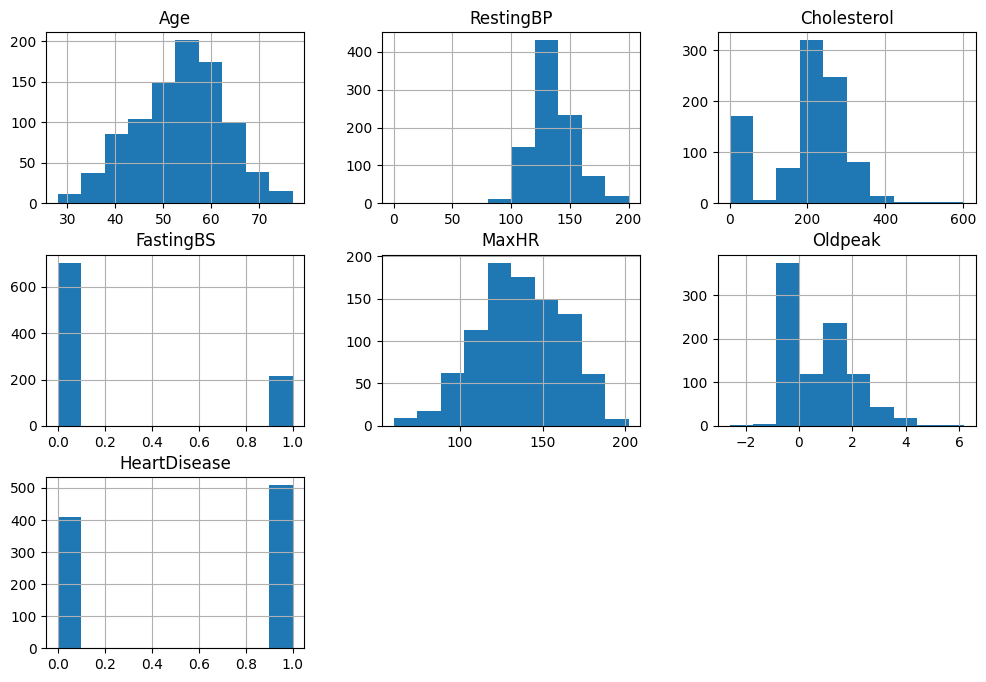

In [149]:
df.hist(figsize=(12,8))
plt.show()

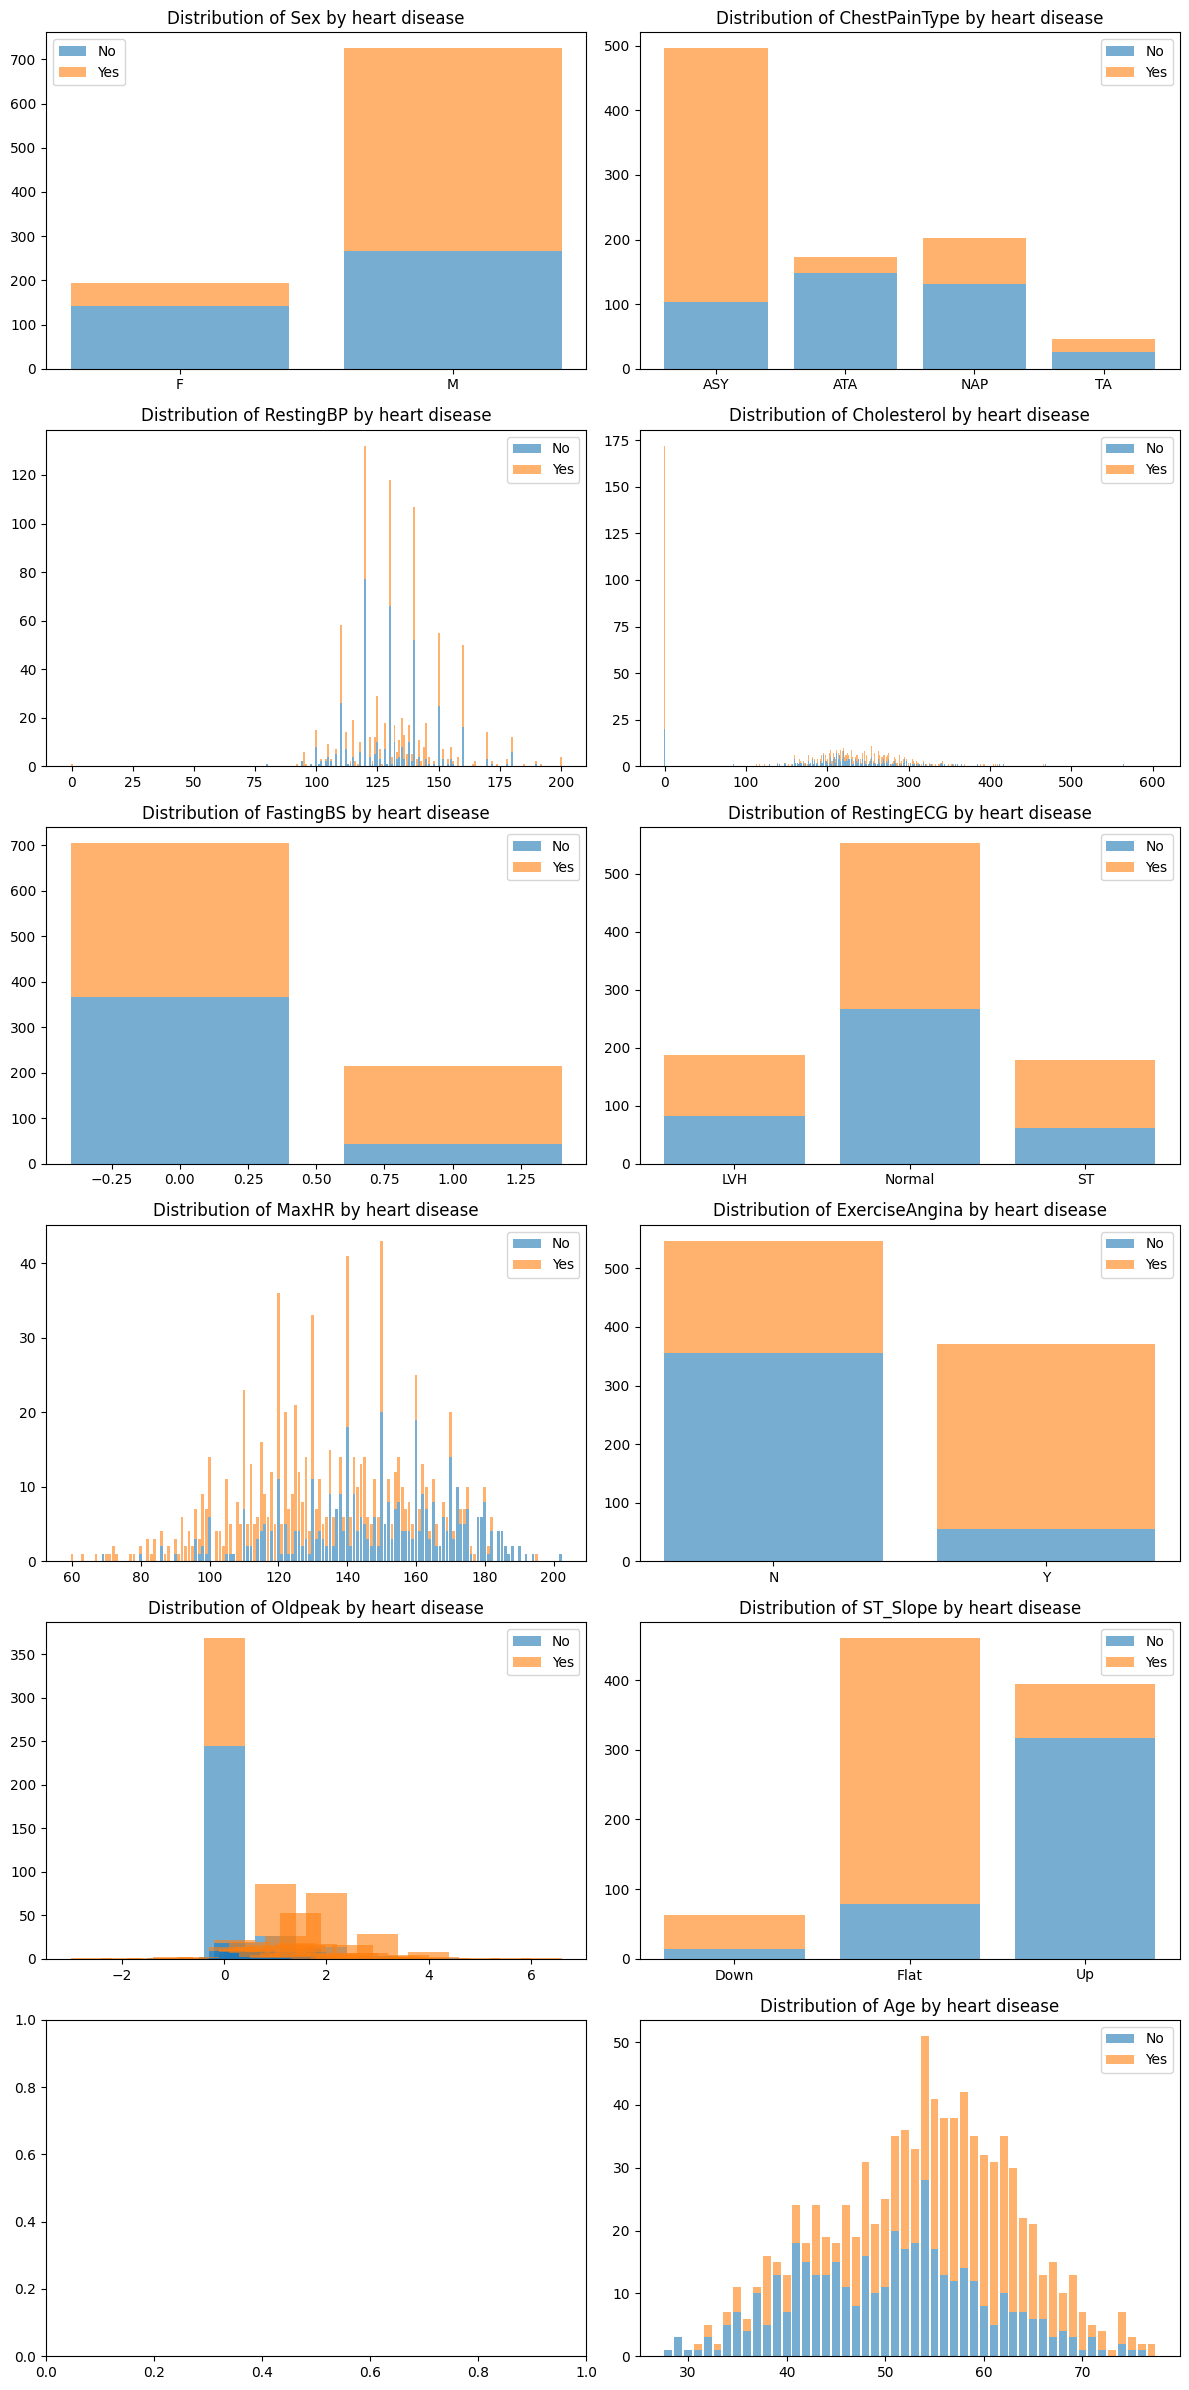

In [150]:
num_columns = len(df.columns) - 1
num_rows = (num_columns + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 4))
axes = axes.flatten()

for i, column in enumerate(df.columns):
    if column != 'HeartDisease':
        values_0 = df[df['HeartDisease'] == 0][column].value_counts().sort_index()
        values_1 = df[df['HeartDisease'] == 1][column].value_counts().sort_index()
        
        all_indices = values_0.index.union(values_1.index)
        values_0 = values_0.reindex(all_indices, fill_value=0)
        values_1 = values_1.reindex(all_indices, fill_value=0)
        
        axes[i-1].bar(all_indices, values_0, label='No', alpha=0.6)
        axes[i-1].bar(all_indices, values_1, bottom=values_0, label='Yes', alpha=0.6)
        axes[i-1].set_title(f'Distribution of {column} by heart disease')
        axes[i-1].legend()

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [151]:
def remove_outliers_from_dataframe(df):
    
    for column in df.columns:
        if column in ['RestingBP', 'Cholesterol', 'MaxHR', 'Age']:
            Q1 = df[column].quantile(0.2)
            Q3 = df[column].quantile(0.8)
            IQR = Q3 - Q1
        
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
        
            df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [152]:
df.shape

(918, 12)

In [153]:
df = remove_outliers_from_dataframe(df)

In [154]:
df.shape

(903, 12)

C:\Users\Ashok Bhatt\AppData\Local\Temp\ipykernel_42844\1321268290.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i-1].set_xticklabels(['No', 'Yes'])
C:\Users\Ashok Bhatt\AppData\Local\Temp\ipykernel_42844\1321268290.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i-1].set_xticklabels(['No', 'Yes'])
C:\Users\Ashok Bhatt\AppData\Local\Temp\ipykernel_42844\1321268290.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i-1].set_xticklabels(['No', 'Yes'])
C:\Users\Ashok Bhatt\AppData\Local\Temp\ipykernel_42844\1321268290.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i-1].set_xticklabels(['No', 'Yes'])
C:\Users\Ashok Bhatt

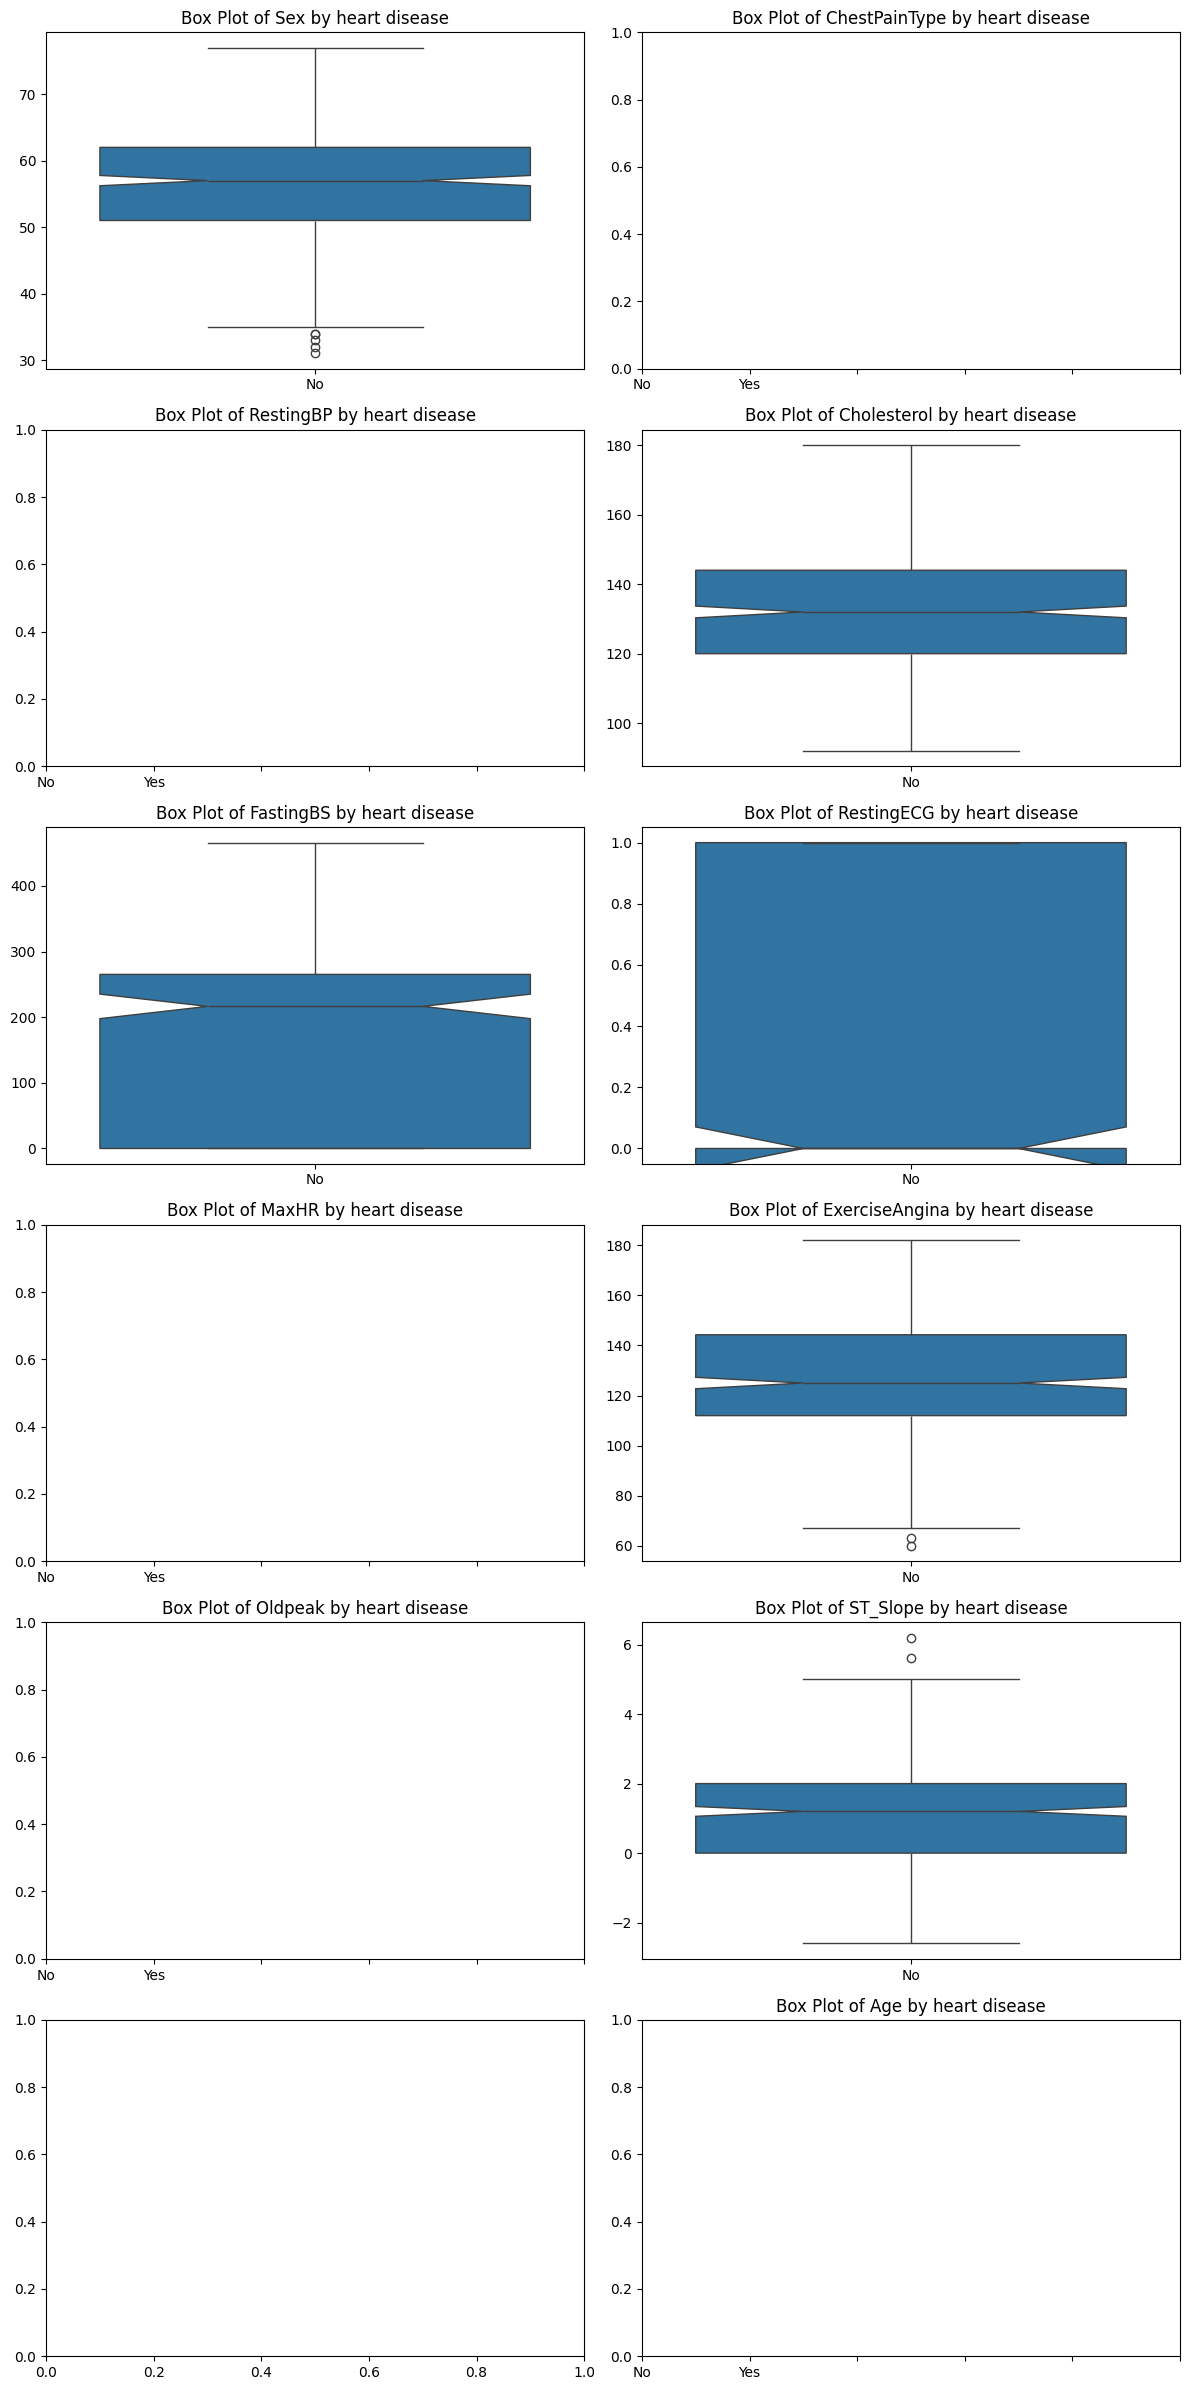

In [155]:
num_columns = len(df.columns) - 1
num_rows = (num_columns + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 4))
axes = axes.flatten()

for i, column in enumerate(df.columns):
    if column != 'HeartDisease':
        values_0 = df[df['HeartDisease'] == 0][column]
        values_1 = df[df['HeartDisease'] == 1][column]
        
        sns.boxplot(data=[values_0, values_1], ax=axes[i], notch=True)
        axes[i-1].set_xticklabels(['No', 'Yes'])
        axes[i-1].set_title(f'Box Plot of {column} by heart disease')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

<Axes: >

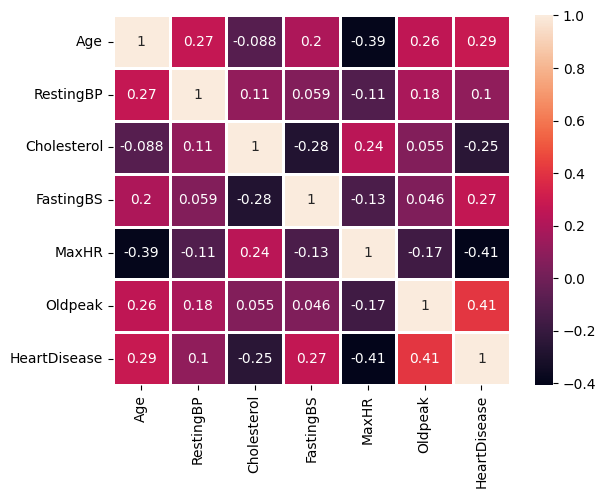

In [156]:
cor = df.select_dtypes(include='number').corr()
sns.heatmap(cor,annot=True,linewidths=1)

In [157]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

<h2>Data Preprocessing</h2>

In [158]:
label = LabelEncoder()

In [159]:
object = df.select_dtypes(include='object')
non_object = df.select_dtypes(exclude='object')

for i in range(0,object.shape[1]):
    object.iloc[:,i] = label.fit_transform(object.iloc[:,i])

df = pd.concat([object,non_object],axis=1)

In [160]:
df.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,1,1,1,0,2,40,140,289,0,172,0.0,0
1,0,2,1,0,1,49,160,180,0,156,1.0,1
2,1,1,2,0,2,37,130,283,0,98,0.0,0
3,0,0,1,1,1,48,138,214,0,108,1.5,1
4,1,2,1,0,2,54,150,195,0,122,0.0,0


<Axes: >

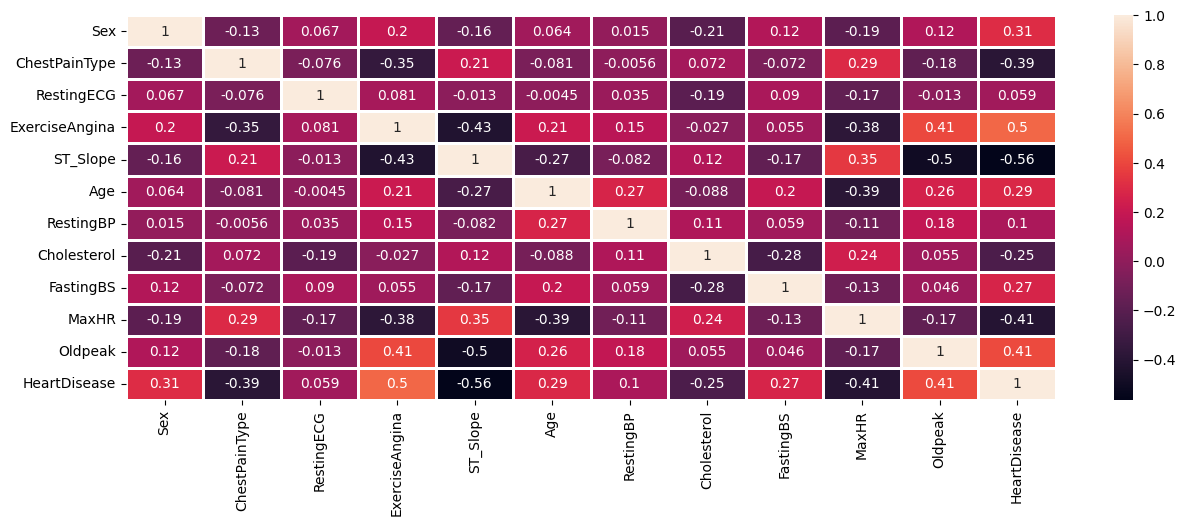

In [161]:
cor = df.corr()
plt.figure(figsize=(15, 5))
sns.heatmap(cor,annot=True,linewidths=1)

In [162]:
X = df.drop(['HeartDisease'],axis=1)
y = df['HeartDisease']

In [163]:
X.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,1,1,1,0,2,40,140,289,0,172,0.0
1,0,2,1,0,1,49,160,180,0,156,1.0
2,1,1,2,0,2,37,130,283,0,98,0.0
3,0,0,1,1,1,48,138,214,0,108,1.5
4,1,2,1,0,2,54,150,195,0,122,0.0


In [164]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

<h2>Model Training</h2>

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [166]:
pf_table_without_tuning = pd.DataFrame(columns=['Model', 'Training Accuracy', 'Testing Accuracy', 'Precision', 'Recall', 'F1-Score'])

In [167]:
pf_table_with_tuning = pd.DataFrame(columns=['Model', 'Training Accuracy', 'Testing Accuracy', 'Precision', 'Recall', 'F1-Score', 'Best Parameters'])

In [168]:
def train_model(model):

    global pf_table_without_tuning

    model.fit(X_train,y_train)

    print(f"{'Accuracy':-^100}")

    y_pred = model.predict(X_train)
    training_accuracy = accuracy_score(y_pred, y_train)
    print("Training accuracy: ", training_accuracy)

    y_pred = model.predict(X_test)
    testing_accuracy = accuracy_score(y_pred, y_test)
    print("Testing accuracy: ", testing_accuracy)

    print(f"\n\n{'Classification Report':-^100}")
    print(classification_report(y_pred, y_test))

    pf_table_without_tuning.loc[len(pf_table_without_tuning)] = [model.__str__(), training_accuracy, testing_accuracy, precision_score(y_pred, y_test), recall_score(y_pred, y_test), f1_score(y_pred, y_test)]

    conf_matrix = confusion_matrix(y_pred, y_test)
    display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Heart Disease', 'Heart Disease'])
    display.plot()

In [169]:
def train_and_tune_model(model, param_grid):

    grid_search = GridSearchCV(estimator = model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print(f"{'Best Params':-^200}")
    print(grid_search.best_params_)

    print(f"{'Accuracy':-^100}")

    y_pred = grid_search.predict(X_train)
    training_accuracy = accuracy_score(y_pred, y_train)
    print("Training accuracy: ", training_accuracy)

    y_pred = grid_search.predict(X_test)
    testing_accuracy = accuracy_score(y_pred, y_test)
    print("Testing accuracy: ", testing_accuracy)

    print(f"\n\n{'Classification Report':-^100}")
    print(classification_report(y_pred, y_test))

    pf_table_with_tuning.loc[len(pf_table_with_tuning)] = [model.__str__(), training_accuracy, testing_accuracy, precision_score(y_pred, y_test), recall_score(y_pred, y_test), f1_score(y_pred, y_test), grid_search.best_params_]

    conf_matrix = confusion_matrix(y_pred, y_test)
    display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Heart Disease', 'Heart Disease'])
    display.plot()

C:\Users\Ashok Bhatt\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


----------------------------------------------Accuracy----------------------------------------------
Training accuracy:  0.8628808864265928
Testing accuracy:  0.850828729281768


---------------------------------------Classification Report----------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        73
           1       0.91      0.83      0.87       108

    accuracy                           0.85       181
   macro avg       0.84      0.86      0.85       181
weighted avg       0.86      0.85      0.85       181



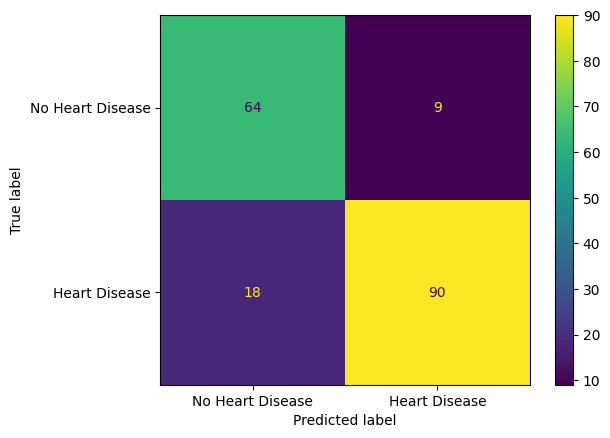

In [170]:
logistic_model = LogisticRegression()
train_model(logistic_model)

----------------------------------------------Accuracy----------------------------------------------
Training accuracy:  0.7188365650969529
Testing accuracy:  0.7513812154696132


---------------------------------------Classification Report----------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.74      0.72        77
           1       0.80      0.76      0.78       104

    accuracy                           0.75       181
   macro avg       0.75      0.75      0.75       181
weighted avg       0.75      0.75      0.75       181



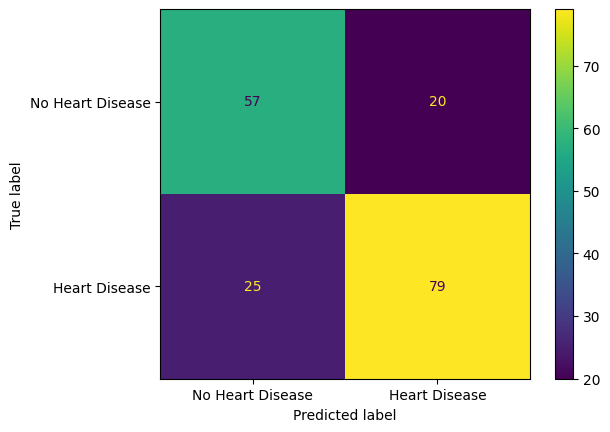

In [171]:
svc_model = SVC()
train_model(svc_model)

----------------------------------------------Accuracy----------------------------------------------
Training accuracy:  0.7880886426592798
Testing accuracy:  0.712707182320442


---------------------------------------Classification Report----------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.70      0.67        76
           1       0.77      0.72      0.75       105

    accuracy                           0.71       181
   macro avg       0.71      0.71      0.71       181
weighted avg       0.72      0.71      0.71       181



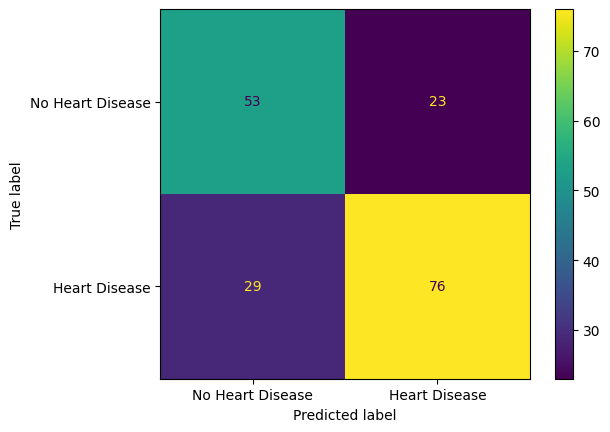

In [172]:
knn_model = KNeighborsClassifier()
train_model(knn_model)

----------------------------------------------Accuracy----------------------------------------------
Training accuracy:  0.8601108033240997
Testing accuracy:  0.8453038674033149


---------------------------------------Classification Report----------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        72
           1       0.91      0.83      0.87       109

    accuracy                           0.85       181
   macro avg       0.84      0.85      0.84       181
weighted avg       0.85      0.85      0.85       181



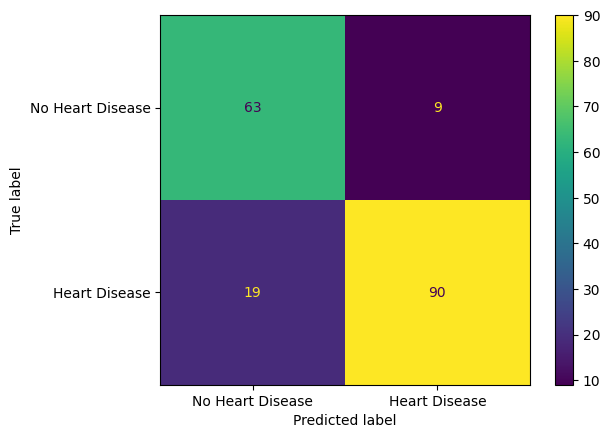

In [173]:
gaussian_nb = GaussianNB()
train_model(gaussian_nb)

----------------------------------------------Accuracy----------------------------------------------
Training accuracy:  1.0
Testing accuracy:  0.8342541436464088


---------------------------------------Classification Report----------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        84
           1       0.84      0.86      0.85        97

    accuracy                           0.83       181
   macro avg       0.83      0.83      0.83       181
weighted avg       0.83      0.83      0.83       181



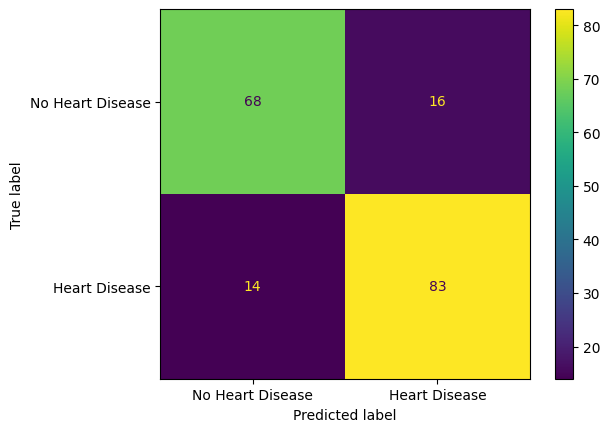

In [174]:
decision_tree_model = DecisionTreeClassifier()
train_model(decision_tree_model)

----------------------------------------------Accuracy----------------------------------------------
Training accuracy:  1.0
Testing accuracy:  0.861878453038674


---------------------------------------Classification Report----------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        75
           1       0.91      0.85      0.88       106

    accuracy                           0.86       181
   macro avg       0.86      0.86      0.86       181
weighted avg       0.87      0.86      0.86       181



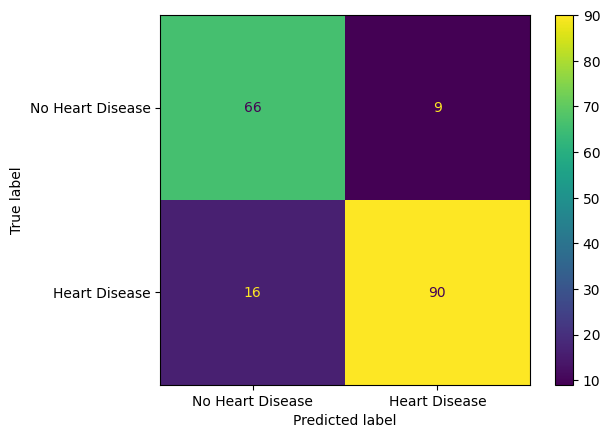

In [175]:
random_forest_model = RandomForestClassifier()
train_model(random_forest_model)

----------------------------------------------Accuracy----------------------------------------------
Training accuracy:  0.9681440443213296
Testing accuracy:  0.8950276243093923


---------------------------------------Classification Report----------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.92      0.88        75
           1       0.94      0.88      0.91       106

    accuracy                           0.90       181
   macro avg       0.89      0.90      0.89       181
weighted avg       0.90      0.90      0.90       181



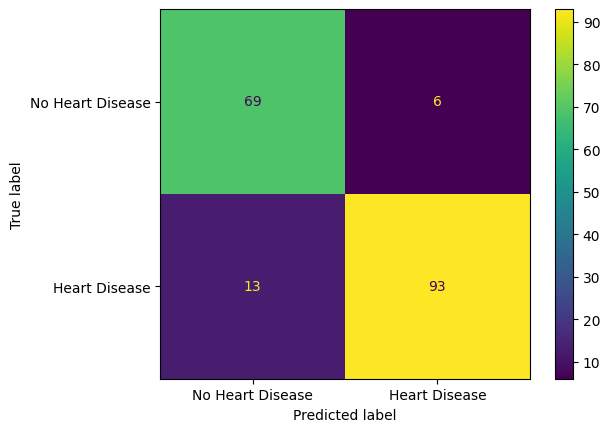

In [176]:
gradient_booosting_model = GradientBoostingClassifier()
train_model(gradient_booosting_model)

In [177]:
pf_table_without_tuning

,Model,Training Accuracy,Testing Accuracy,Precision,Recall,F1-Score
0,LogisticRegression(),0.862881,0.850829,0.909091,0.833333,0.869565
1,SVC(),0.718837,0.751381,0.797980,0.759615,0.778325
2,KNeighborsClassifier(),0.788089,0.712707,0.767677,0.723810,0.745098
3,GaussianNB(),0.860111,0.845304,0.909091,0.825688,0.865385
4,DecisionTreeClassifier(),1.000000,0.834254,0.838384,0.855670,0.846939
5,RandomForestClassifier(),1.000000,0.861878,0.909091,0.849057,0.878049
6,GradientBoostingClassifier(),0.968144,0.895028,0.939394,0.877358,0.907317


<h2>Hyperparameter Tuning</h2>

C:\Users\Ashok Bhatt\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
300 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Ashok Bhatt\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ashok Bhatt\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Ashok Bhatt\AppData\Roami

----------------------------------------------------------------------------------------------Best Params-----------------------------------------------------------------------------------------------
{'C': 100, 'l1_ratio': 0, 'penalty': 'l1', 'solver': 'liblinear'}
----------------------------------------------Accuracy----------------------------------------------
Training accuracy:  0.8642659279778393
Testing accuracy:  0.8453038674033149


---------------------------------------Classification Report----------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        74
           1       0.90      0.83      0.86       107

    accuracy                           0.85       181
   macro avg       0.84      0.85      0.84       181
weighted avg       0.85      0.85      0.85       181



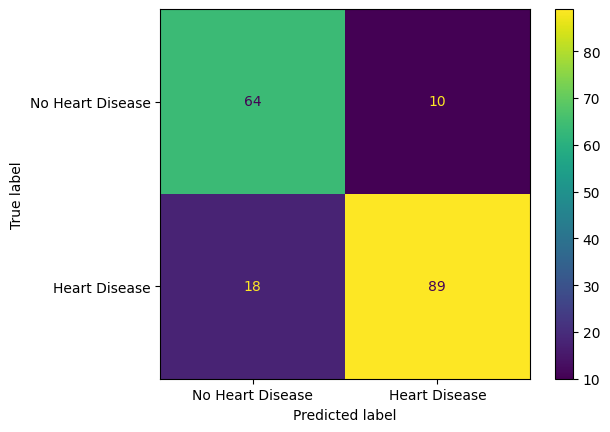

In [178]:
grid_params = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'l1_ratio': [0, 0.5, 1]
}

train_and_tune_model(logistic_model, grid_params)

In [179]:
grid_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [3, 4, 5]
}

train_and_tune_model(svc_model, grid_params)

KeyboardInterrupt: 

----------------------------------------------------------------------------------------------Best Params-----------------------------------------------------------------------------------------------
{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
----------------------------------------------Accuracy----------------------------------------------
Training accuracy:  1.0
Testing accuracy:  0.7348066298342542


---------------------------------------Classification Report----------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.74      0.69        72
           1       0.81      0.73      0.77       109

    accuracy                           0.73       181
   macro avg       0.73      0.74      0.73       181
weighted avg       0.74      0.73      0.74       181



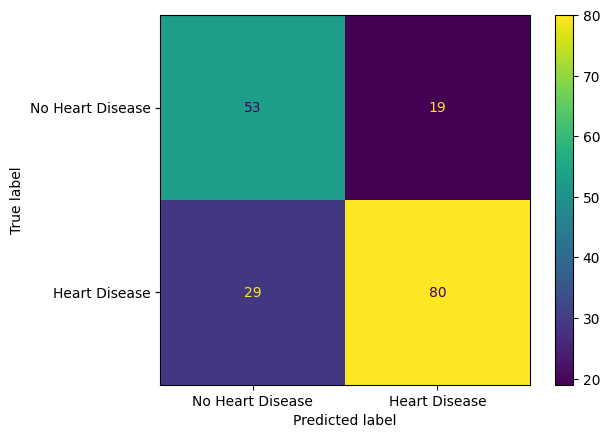

In [ ]:
grid_params = {
    'n_neighbors': np.arange(1,20, 2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

train_and_tune_model(knn_model, grid_params)

----------------------------------------------------------------------------------------------Best Params-----------------------------------------------------------------------------------------------
{'var_smoothing': 1e-06}
----------------------------------------------Accuracy----------------------------------------------
Training accuracy:  0.8587257617728532
Testing accuracy:  0.850828729281768


---------------------------------------Classification Report----------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        73
           1       0.91      0.83      0.87       108

    accuracy                           0.85       181
   macro avg       0.84      0.86      0.85       181
weighted avg       0.86      0.85      0.85       181



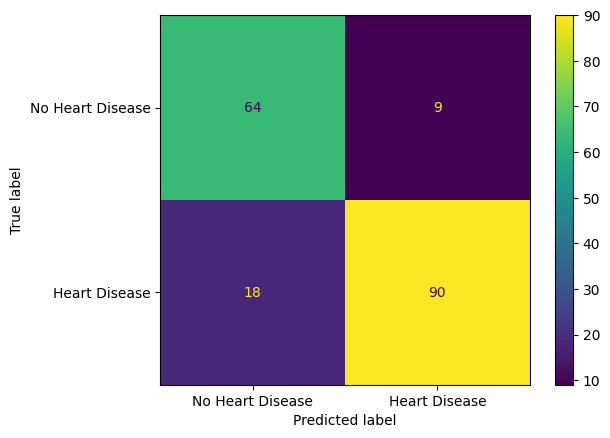

In [ ]:
grid_params = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

train_and_tune_model(gaussian_nb, grid_params)

----------------------------------------------------------------------------------------------Best Params-----------------------------------------------------------------------------------------------
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10}
----------------------------------------------Accuracy----------------------------------------------
Training accuracy:  0.9127423822714681
Testing accuracy:  0.8287292817679558


---------------------------------------Classification Report----------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.83      0.81        77
           1       0.87      0.83      0.85       104

    accuracy                           0.83       181
   macro avg       0.82      0.83      0.83       181
weighted avg       0.83      0.83      0.83       181



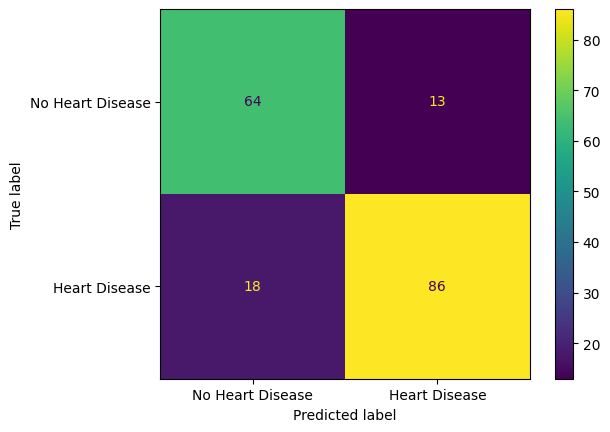

In [ ]:
grid_params = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

train_and_tune_model(decision_tree_model, grid_params)

In [ ]:
grid_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

train_and_tune_model(random_forest_model, grid_params)

KeyboardInterrupt: 

----------------------------------------------------------------------------------------------Best Params-----------------------------------------------------------------------------------------------
{'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
----------------------------------------------Accuracy----------------------------------------------
Training accuracy:  0.9598337950138505
Testing accuracy:  0.8784530386740331


---------------------------------------Classification Report----------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.92      0.86        72
           1       0.94      0.85      0.89       109

    accuracy                           0.88       181
   macro avg       0.87      0.88      0.88       181
weighted avg       0.89      0.88      0.88       181



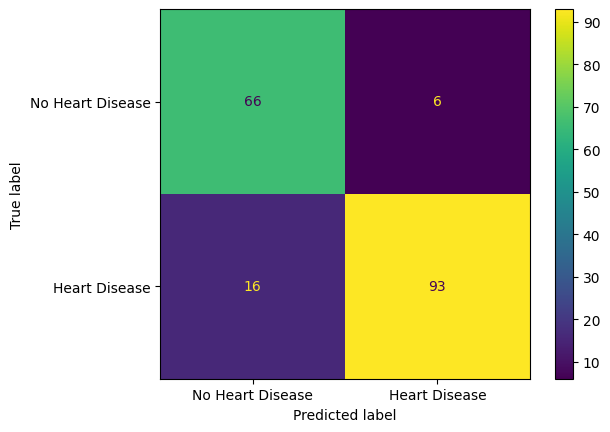

In [ ]:
grid_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

train_and_tune_model(gradient_booosting_model, grid_params)

In [ ]:
pf_table_without_tuning

,Model,Training Accuracy,Testing Accuracy,Precision,Recall,F1-Score
0,LogisticRegression(),0.862881,0.850829,0.909091,0.833333,0.869565
1,SVC(),0.718837,0.751381,0.797980,0.759615,0.778325
2,KNeighborsClassifier(),0.788089,0.712707,0.767677,0.723810,0.745098
3,GaussianNB(),0.860111,0.845304,0.909091,0.825688,0.865385
4,DecisionTreeClassifier(),1.000000,0.850829,0.838384,0.882979,0.860104
5,RandomForestClassifier(),1.000000,0.867403,0.919192,0.850467,0.883495
6,GradientBoostingClassifier(),0.968144,0.895028,0.939394,0.877358,0.907317


In [ ]:
pf_table_with_tuning

,Model,Training Accuracy,Testing Accuracy,Precision,Recall,F1-Score,Best Parameters
0,LogisticRegression(),0.864266,0.845304,0.898990,0.831776,0.864078,"{'C': 100, 'l1_ratio': 0.5, 'penalty': 'l1', '..."
1,KNeighborsClassifier(),1.000000,0.734807,0.808081,0.733945,0.769231,"{'metric': 'manhattan', 'n_neighbors': 9, 'wei..."
2,GaussianNB(),0.858726,0.850829,0.909091,0.833333,0.869565,{'var_smoothing': 1e-06}
3,DecisionTreeClassifier(),0.912742,0.828729,0.868687,0.826923,0.847291,"{'criterion': 'entropy', 'max_depth': 10, 'max..."
4,GradientBoostingClassifier(),0.959834,0.878453,0.939394,0.853211,0.894231,"{'learning_rate': 0.2, 'max_depth': 3, 'min_sa..."
5,LogisticRegression(),0.864266,0.845304,0.898990,0.831776,0.864078,"{'C': 100, 'l1_ratio': 0, 'penalty': 'l1', 'so..."


In [ ]:
for i in range(pf_table_with_tuning.shape[0]):
    print(f"\n{pf_table_with_tuning.iloc[i]['Model']}")
    print(pf_table_with_tuning.iloc[i]["Best Parameters"])

NameError: name 'pf_table_with_tuning' is not defined

In [ ]:
plt.bar(pf_table_without_tuning["Model"], pf_table_without_tuning["Testing Accuracy"], color='skyblue')
plt.xlabel('Model Names')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison between models without hyperparameter tuning')
plt.show()

In [ ]:
plt.bar(pf_table_with_tuning["Model"], pf_table_with_tuning["Testing Accuracy"], color='skyblue')
plt.xlabel('Model Names')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison between models with hyperparameter tuning')
plt.show()